In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/mushroom-classification/mushrooms.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Blu Leblanc
# Introduction to Machine Learning: Supervised Learning
# Final Project

https://github.com/Blu-LeBlanc/DTSA-5509-Final-Project.git

Mushroom hunting, commonly referred to as "shrooming" is a popular activity involving the search for edible mushroom species. However, a significant challenge arises from the fact that while some mushrooms are safe to consume, others are highly toxic and pose serious helth risks. Therefore, accurately classifying mushrooms based on their characteristics is crucial.
This project focuses on practicing supervised classification techniques to distinguish between edible and poisonous mushrooms. The objective is to compare various classification models and evaluate their effectiveness. Additionally, the project examines different feature selection techniques to identify the most important characteristics for accurate classification. The findings will provide insights into the most relevant attributes for distinguishing between safe and toxic mushroom species.

# Dataset

I found a public source dataset on kaggle consisting of descriptions of hypothetical samples of 23 different species of mushrooms. Each mushroom is designated as edible or poisonous, and there are accompanying features for each mushroom. The dataset was original located at the UCI Machine Learning repository. There are 23 columns and 8124 entries.

UCI Machine Learning (2017). Mushroom Classification[Data Set]. Kaggle

# Data Loading

First let's import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

Let's read in the dataset and gain an understanding of the data.

In [3]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The class column designates if the mushroom is edible (e) or poisonous (p). The other 22 columns are categorical variables that describe characteristics of mushrooms. The datacard explains the abbrebviations for each column. Below is the attribute information copied from the datacard: 

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Explorative Data Analysis

First I will look at the distribution of our target variable (class) to determine if it is fit for modeling.

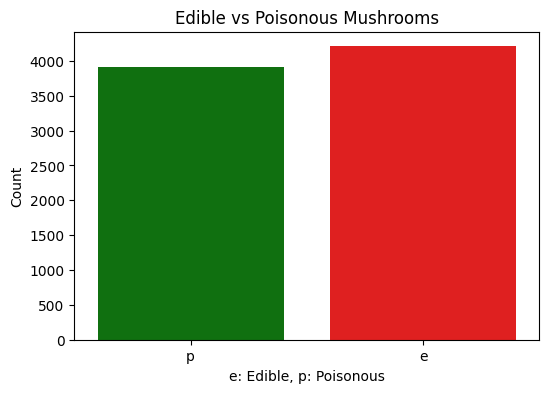

Class Distribution
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


In [5]:
#distribution of the target variable

plt.figure(figsize = (6, 4))
sns.countplot(x = df["class"], palette = ["green", "red"])
plt.title("Edible vs Poisonous Mushrooms")
plt.xlabel("e: Edible, p: Poisonous")
plt.ylabel("Count")
plt.show()

class_count = df["class"].value_counts(normalize = True) * 100
print("Class Distribution")
print(class_count)


The dataset is fairly balanced with good amount of edible and poisonous mushrooms. I need to check the dataset and make sure there are no missing values.

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


There are no missing values, however the data card states that there are certain columns with "?" for missing values. I will find these instances and remove the column if there are too many missing values.

In [7]:
question_mark_columns = (df == "?").sum()
print(question_mark_columns[question_mark_columns > 0])

stalk-root    2480
dtype: int64


The stalk-root column has a large amount of question marks. I will remove this feature. Additionally viewing the dataset: I found that veil-type has one value so I will drop it. There are some features with 2 unique values and some with many unique values.

In [8]:
df = df.drop('veil-type', axis = 1)
df = df.drop('stalk-root', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

# Correlation Analysis

One technique for determing which features are most important is Chi-Square testing. I will use a Chi-Square Test to measure statistical dependence between categorical variables and the target class

In [9]:
dfe = df.apply(LabelEncoder().fit_transform)

#set target
X = dfe.drop('class', axis = 1)
y = dfe['class']

chi, p = chi2(X, y)

chi_square_result = pd.DataFrame({"Feature": X.columns,
                   "Chi-Square Score": chi,
                   "p-value": p}).sort_values(by = "p-value")
print(chi_square_result)

                     Feature  Chi-Square Score        p-value
16                 ring-type       1950.610146   0.000000e+00
7                  gill-size       1636.606833   0.000000e+00
8                 gill-color       5957.764469   0.000000e+00
3                    bruises       1194.277352  1.069037e-261
6               gill-spacing        826.795274  8.061293e-182
19                   habitat        751.309489  2.082916e-165
17         spore-print-color        379.132729   1.922119e-84
18                population        311.766736   9.002366e-70
10  stalk-surface-above-ring        222.982400   2.022392e-50
1                cap-surface        214.068544   1.779362e-48
11  stalk-surface-below-ring        206.648180   7.398869e-47
12    stalk-color-above-ring        119.792216   7.024638e-28
13    stalk-color-below-ring        109.789410   1.089740e-25
4                       odor         75.910163   2.968682e-18
9                stalk-shape         36.594105   1.454709e-09
15      

My initial observations are that ring-type, gill-color, and gill-size have very strong correlation with the target variable. On the other hand, veil-color and gill-attachment have significantly lower correlation.
At first, I was going to remove certain columns with weaker correlation, but I decided against it. I realize now that removing features could be worse than keeping them, especially easy-to-see features like cap-color and cap-shape which have low correlation. Instead I will compare this feature selection with feature selection embedded in modeling techniques.

# Set up data for Modeling

Now we will encode the categorical variables for modeling. Then I will separate the data into training and testing sets for modeling. I will stick with an %80 %20 split.

In [10]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns = ["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

The first model I wish to view is a Random Forest Classifier. I chose this model because it is very effective for simple classification for one target categorical variable.

In [11]:
from sklearn.ensemble import RandomForestClassifier

rtree = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 24)
rtree.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=24)

I will evaluate each model based on accuracy score and classification report.

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Predictions
y_pred = rtree.predict(X_test)

#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:\n", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy:
 0.9932307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       869
           1       1.00      0.99      0.99       756

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix:
 [[869   0]
 [ 11 745]]


Let's incorporate feature selection to the model and create a bar graph to see the most important features as chosen by the Random Forest Classifier

                     Feature  Importance
4                       odor    0.158026
7                  gill-size    0.154156
8                 gill-color    0.132698
17         spore-print-color    0.090550
16                 ring-type    0.077537
10  stalk-surface-above-ring    0.070990
11  stalk-surface-below-ring    0.063531
18                population    0.056547
6               gill-spacing    0.052785
3                    bruises    0.035735
12    stalk-color-above-ring    0.019487
19                   habitat    0.019373
9                stalk-shape    0.017827
13    stalk-color-below-ring    0.015421
2                  cap-color    0.011668
15               ring-number    0.008697
1                cap-surface    0.006759
0                  cap-shape    0.003258
5            gill-attachment    0.002544
14                veil-color    0.002410


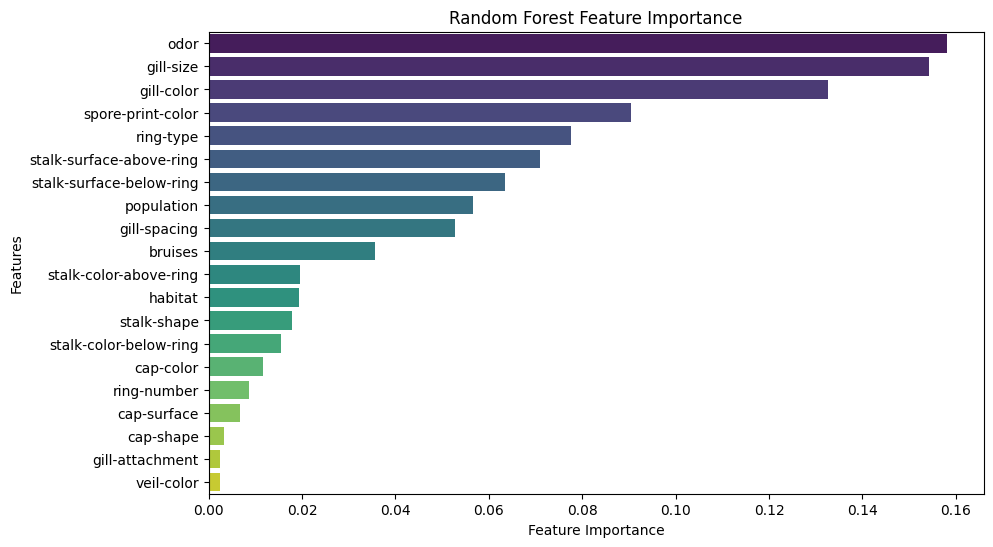

In [13]:
rf_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rtree.feature_importances_})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by="Importance", ascending=False)

print(rf_feature_importance_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

The model accuracy seems incredibly high. To verify that my model is generalizing well, I will perform cross validation.

In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rtree, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.9904605909871499


I chose XGBoost Classifier as the second model to classify mushrooms. I will also perform feature selection and graph the result to compare to other feature selection methods.

In [15]:
xgb_c = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=24,
    max_depth=5,             
    learning_rate=0.1,       
    n_estimators=100)
xgb_c.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=24, ...)

In [16]:
y_pred = xgb_c.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:\n", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy:
 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[869   0]
 [  0 756]]


This time my model accuracy is 100%. Either there is some mistake or mushrooms are very easy to classify given the characteristic data provided. I will perform cross validation and reshuffle the labels to verify that there isn't a mistake with the model.

In [17]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_c, X_train, y_train, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy: 1.0


In [18]:
y_train_shuffled = np.random.permutation(y_train)
xgb_c.fit(X_train, y_train_shuffled)
y_pred_shuffled = xgb_c.predict(X_test)

print("Accuracy after shuffling labels:", accuracy_score(y_test, y_pred_shuffled))

Accuracy after shuffling labels: 0.5175384615384615


There doesn't seem to be an issue with the model overfitting. Now let us see the feature selection chosen by the XGBoost Classifier.

                     Feature  Importance
16                 ring-type    1.955130
3                    bruises    1.415035
1                cap-surface    1.302510
8                 gill-color    1.294200
10  stalk-surface-above-ring    1.193918
19                   habitat    1.178920
11  stalk-surface-below-ring    1.177916
4                       odor    1.164253
18                population    1.151142
13    stalk-color-below-ring    1.120446
12    stalk-color-above-ring    1.119502
17         spore-print-color    1.086298
0                  cap-shape    1.065935
2                  cap-color    0.977359
15               ring-number    0.924760
7                  gill-size    0.881105
6               gill-spacing    0.796274
9                stalk-shape    0.757356
14                veil-color    0.515665
5            gill-attachment    0.432758


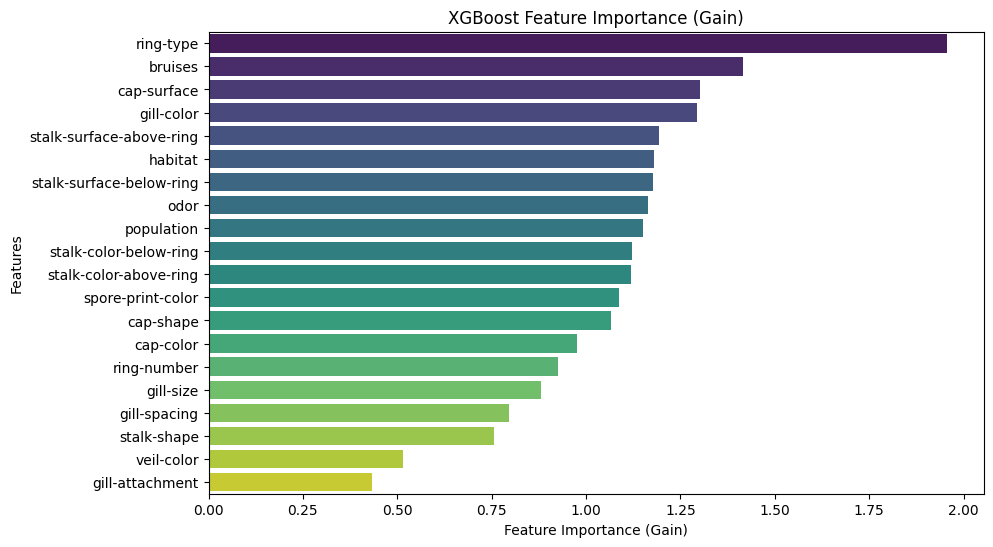

In [19]:
xgb_importance = xgb_c.get_booster().get_score(importance_type='gain')  
xgb_feature_importance_df = pd.DataFrame(list(xgb_importance.items()), columns=['Feature', 'Importance'])
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by="Importance", ascending=False)

print(xgb_feature_importance_df)
# Plot for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df, palette="viridis")
plt.xlabel("Feature Importance (Gain)")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Gain)")
plt.show()

# Conclusion

In this project, I implemented and evaluated XGBoost and Random Forest Classifiers for the objective of mushroom classification. In particular, I focused on feature importance to find the most important characteristics for mushroom hunters.


Model Performance:
My generated models had incredibly high accuracy, so high that I thought it was a mistake. To verify my models did not have overfitting issues, I performed cross validation on both models. For the XGBoost classifier, I even reshuffled the labels to ensure the model was working properly since it had 100% accuracy. The cross validation and reshuffling indicated that the models were working as intended. My hypothesis is that the dataset is very easy to model. It seems that running models with all the characteristics included yields very easy classification.


Feature Importance: 
One key objective was to compare feature importance rankings across the models. This could be an indicator of the most important characteristics to look out for when mushroom hunting. Below are the top 5 features chosen by each technique.
Random Forest Classifier: (odor, gill-size, gill-color, spore-print-color, ring-type). 
XGBoost Classifier: (stalk-shape, stalk-surface-above-ring, odor, stalk-surface-below-ring, gill-size)
Chi-Squared Analysis: (ring-type, gill-size, gill-color, bruises, gill-spacing)

There are definitely similarities between the three techniques. All three include gill-size, and other gill characteristics seem important too. I am surprised that odor is not included in the Chi-Squared top 5. I attribute the differences in the top 5 with the difference in the feature selection techniques. It feels like the Chi-Squared implementation is redundant, given that models use more robust selection techniques. 


The difference between the models' importance can be attributed to the way they measure feature importance and how the models are constructed. Overall both models performed exceptionally well at classifying mushrooms, perhaps too well. With the incredible level of accuracy, the models seem redundant. It seems that classifying mushrooms is too easy with this dataset. There is a lot of room for further improvements. I believe that removing certain features would be more interesting in regards to model creation. Also, I believe comparing these feature importance lists to a correlation heatmap could bring further insight. Continuing on with the trend of mushroom classification, gathering images of mushrooms for image classification could be more effective tool for mushroom hunting at large.